<a href="https://colab.research.google.com/github/marayyy/Krayo/blob/Guvi/Krayo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Krayo Task

**Scenario: Forecasting Expenditures based on past data for X Company**

**Business Problem:** X Company is a mid-sized enterprise operating in a dynamic business environment. To ensure financial stability and effective resource allocation, the company needs to accurately forecast its future expenditures. Understanding how much the company is likely to spend in different expense categories, such as rent, utilities, salaries, and more

**Submitted By: Raj kumar.s**

# Step 1: Setup and Data Preparation
**Installed Required Libraries:**

In [129]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose

**Loaded the Dataset:**

Loaded the expenditure dataset from the provided CSV file, which contains columns like Year, Month, and various expenditure categories.

In [130]:
import pandas as pd

# Loaded the dataset from an Excel file
data = pd.read_excel("/content/Expenditure_data.xlsx")

In [131]:
data

,Year,Month,Rent,Electricity,Salaries and Wages,Office Supplies,Marketing and Ads,R&D,Training programs,Miscellaneous
0,2000,Jan,150000,20000,40000,50000,10000,10000,10000,8000
1,2000,Feb,150000,20000,40000,9000,10000,10000,10000,8000
2,2000,Mar,150000,20000,40000,9000,10000,10000,10000,8000
3,2000,Apr,150000,20000,40000,9000,10000,10000,10000,8000
4,2000,May,150000,20000,40000,9000,10000,10000,10000,8000
...,...,...,...,...,...,...,...,...,...,...
279,2023,Apr,300000,35000,50000,20000,15000,10800,8700,20000
280,2023,May,300000,35000,50000,20000,15000,10800,8700,20000
281,2023,Jun,300000,35000,50000,20000,15000,10800,8700,20000
282,2023,Jul,300000,35000,50000,20000,15000,10800,8700,20000


In [132]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284 entries, 0 to 283
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Year                284 non-null    int64 
 1   Month               284 non-null    object
 2   Rent                284 non-null    int64 
 3   Electricity         284 non-null    int64 
 4   Salaries and Wages  284 non-null    int64 
 5   Office Supplies     284 non-null    int64 
 6   Marketing and Ads   284 non-null    int64 
 7   R&D                 284 non-null    int64 
 8   Training programs   284 non-null    int64 
 9   Miscellaneous       284 non-null    int64 
dtypes: int64(9), object(1)
memory usage: 22.3+ KB


In [133]:
data.describe()

,Year,Rent,Electricity,Salaries and Wages,Office Supplies,Marketing and Ads,R&D,Training programs,Miscellaneous
count,284.000000,284.000000,284.000000,284.000000,284.000000,284.000000,284.000000,284.000000,284.000000
mean,2011.338028,198591.549296,24859.154930,33521.126761,8694.366197,10812.676056,11210.563380,9994.014085,13387.323944
std,6.845996,53149.453249,5314.945325,11426.655533,3204.827954,1057.355803,1342.178375,1244.720049,3382.763609
min,2000.000000,150000.000000,20000.000000,15000.000000,7100.000000,8800.000000,8900.000000,8000.000000,7500.000000
25%,2005.000000,150000.000000,20000.000000,25000.000000,7600.000000,10000.000000,10000.000000,9500.000000,12000.000000
50%,2011.000000,200000.000000,25000.000000,35000.000000,8100.000000,10900.000000,11000.000000,9600.000000,13500.000000
75%,2017.000000,250000.000000,30000.000000,44000.000000,8600.000000,11100.000000,12000.000000,11100.000000,16500.000000
max,2023.000000,300000.000000,35000.000000,50000.000000,50000.000000,15000.000000,13800.000000,12500.000000,20000.000000


In [134]:
# Checked for any missing values
missing_values = data.isnull().sum()
print("Missing Values:\n", missing_values)

Missing Values:
 Year                  0
Month                 0
Rent                  0
Electricity           0
Salaries and Wages    0
Office Supplies       0
Marketing and Ads     0
R&D                   0
Training programs     0
Miscellaneous         0
dtype: int64


In [135]:
data.columns

Index(['Year', 'Month', 'Rent', 'Electricity', 'Salaries and Wages',
       'Office Supplies', 'Marketing and Ads', 'R&D', 'Training programs',
       'Miscellaneous'],
      dtype='object')

In [136]:
data.shape

(284, 10)

In [137]:
data.size

2840

**Combined "Year" and "Month" into a single date column**

In [138]:
data = pd.read_excel("/content/Expenditure_data.xlsx", parse_dates={'Date': ['Year', 'Month']})

# Create a DateTimeIndex with a common day (e.g., 1st day of the month)
data['Date'] = pd.to_datetime(data['Date'].dt.strftime('%Y-%m-01'))

# Set the "Date" column as the index
data.set_index('Date', inplace=True)

# Now, you can proceed with resampling and seasonal decomposition
monthly_data = data['Rent'].resample('M').mean()

data = pd.read_excel("/content/Expenditure_data.xlsx", parse_dates={'Date': ['Year', 'Month']})

# Format the date as "YYYY-Mon" with the month in words
data['Date'] = data['Date'].dt.strftime('%Y-%b')

# Set the "Date" column as the index
data.set_index('Date', inplace=True)

In [139]:
data

,Rent,Electricity,Salaries and Wages,Office Supplies,Marketing and Ads,R&D,Training programs,Miscellaneous
Date,,,,,,,,
2000-Jan,150000,20000,40000,50000,10000,10000,10000,8000
2000-Feb,150000,20000,40000,9000,10000,10000,10000,8000
2000-Mar,150000,20000,40000,9000,10000,10000,10000,8000
2000-Apr,150000,20000,40000,9000,10000,10000,10000,8000
2000-May,150000,20000,40000,9000,10000,10000,10000,8000
...,...,...,...,...,...,...,...,...
2023-Apr,300000,35000,50000,20000,15000,10800,8700,20000
2023-May,300000,35000,50000,20000,15000,10800,8700,20000
2023-Jun,300000,35000,50000,20000,15000,10800,8700,20000


# Step 2: Exploratory Data Analysis (EDA)
**Visualized the data**

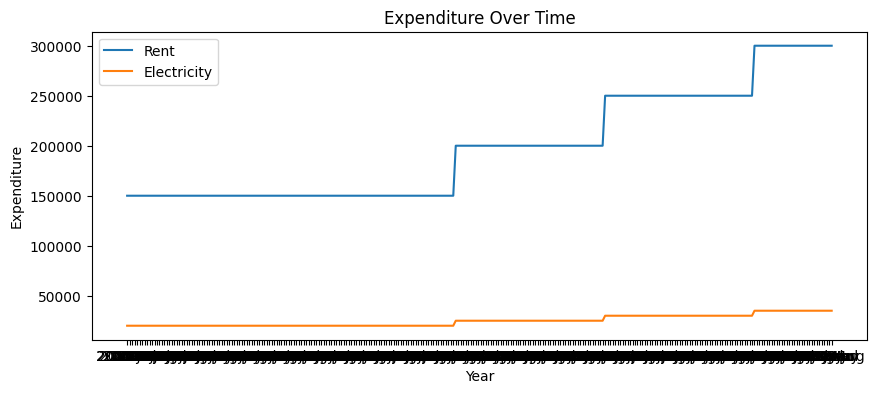

In [140]:
# Plotting Rent & Electricity

plt.figure(figsize=(10, 4))
plt.plot(data.index, data['Rent'], label='Rent')
plt.xlabel('Year')
plt.ylabel('Expenditure')
plt.title('Expenditure Over Time')
plt.plot(data.index, data['Electricity'], label='Electricity')
plt.xlabel('Year')
plt.legend()
plt.show()

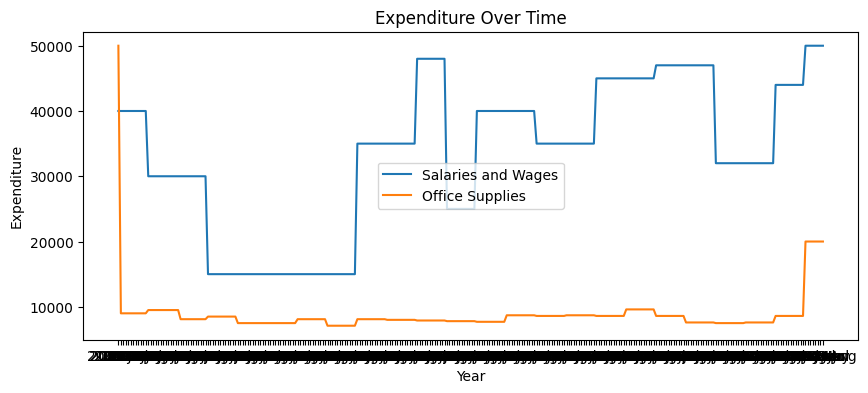

In [141]:
# Plotting Salaries, Wages & Office Supplies

plt.figure(figsize=(10, 4))
plt.plot(data.index, data['Salaries and Wages'], label='Salaries and Wages')
plt.xlabel('Year')
plt.ylabel('Expenditure')
plt.title('Expenditure Over Time')
plt.plot(data.index, data['Office Supplies'], label='Office Supplies')
plt.xlabel('Year')
plt.legend()
plt.show()

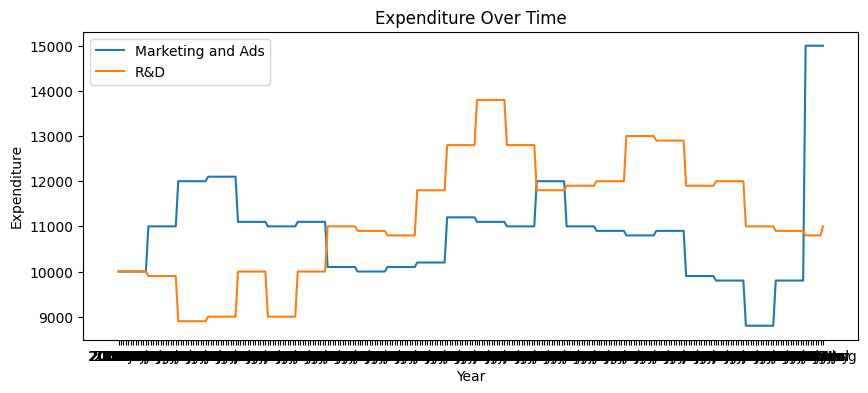

In [142]:
# Plotting Marketing, Ads and R&D

plt.figure(figsize=(10, 4))
plt.plot(data.index, data['Marketing and Ads'], label='Marketing and Ads')
plt.xlabel('Year')
plt.ylabel('Expenditure')
plt.title('Expenditure Over Time')
plt.plot(data.index, data['R&D'], label='R&D')
plt.xlabel('Year')
plt.legend()
plt.show()

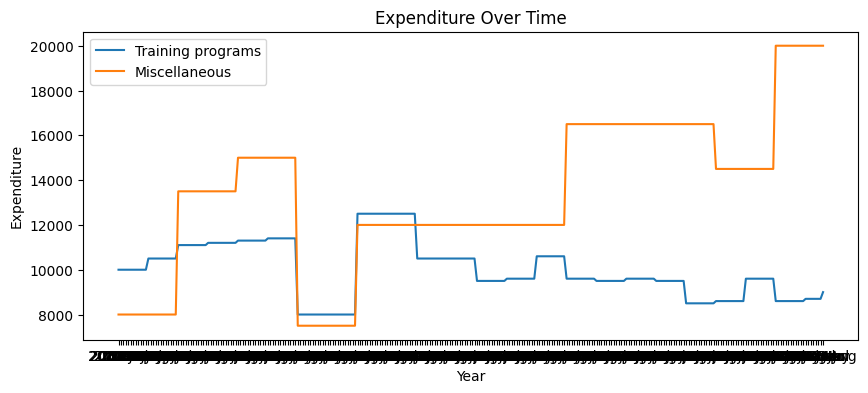

In [143]:
# Plotting Training programs & Miscellaneous
plt.figure(figsize=(10, 4))
plt.plot(data.index, data['Training programs'], label='Training programs')
plt.xlabel('Year')
plt.ylabel('Expenditure')
plt.title('Expenditure Over Time')
plt.plot(data.index, data['Miscellaneous'], label='Miscellaneous')
plt.xlabel('Year')
plt.legend()
plt.show()

**Decomposed the resampled time series into,**

1. Trend,
2. Seasonality and
3. Residual Errors.

In [144]:
decomposition = seasonal_decompose(monthly_data, model='additive')

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

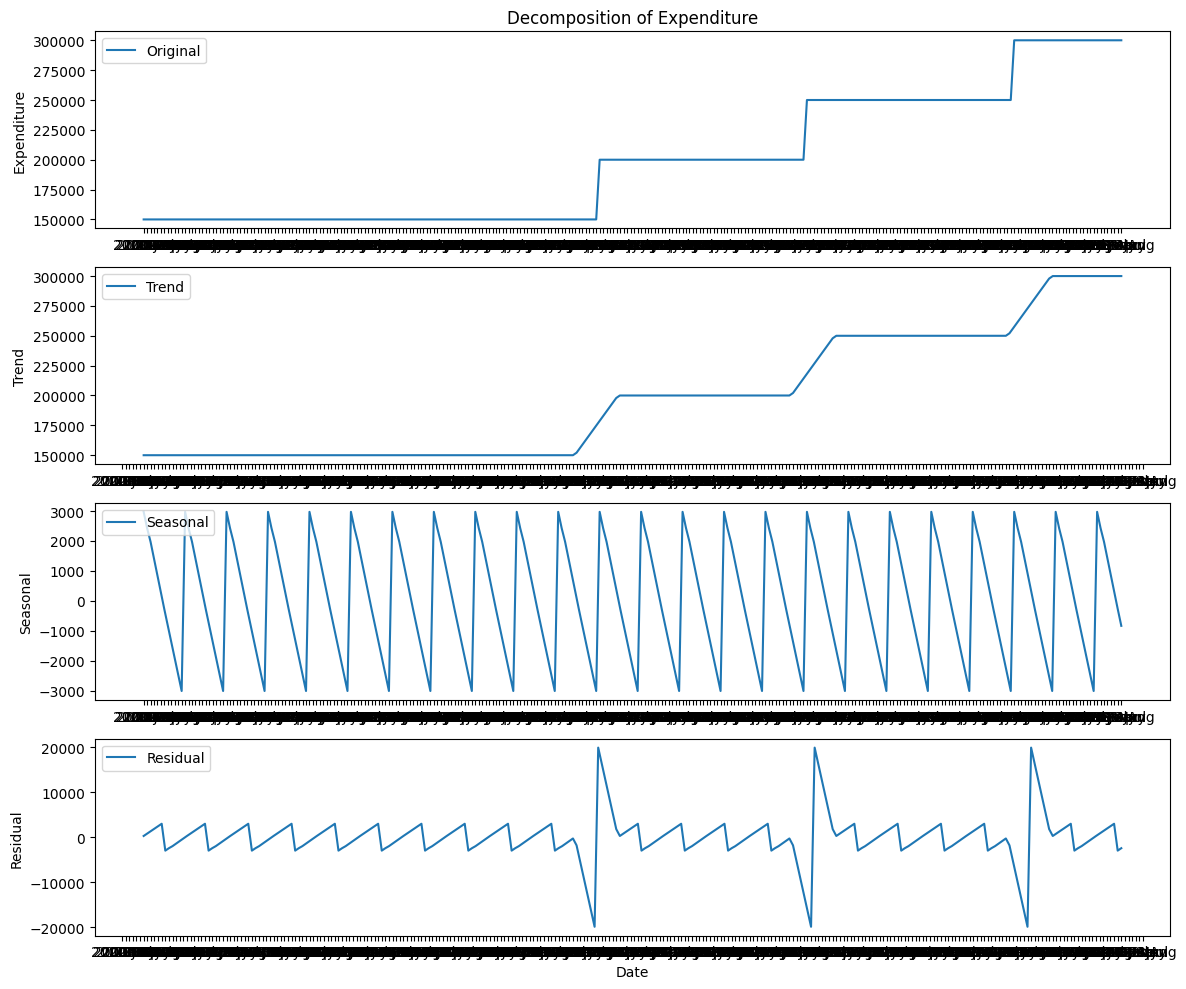

In [160]:
# Plot the decomposition components with improved layout
plt.figure(figsize=(12, 10))

plt.subplot(411)
plt.plot(data.index, data['Rent'], label='Original')
plt.legend(loc='upper left')
plt.ylabel('Expenditure')
plt.title('Decomposition of Expenditure')

plt.subplot(412)
plt.plot(data.index, trend, label='Trend')
plt.legend(loc='upper left')
plt.ylabel('Trend')

plt.subplot(413)
plt.plot(data.index, seasonal, label='Seasonal')
plt.legend(loc='upper left')
plt.ylabel('Seasonal')

plt.subplot(414)
plt.plot(data.index, residual, label='Residual')
plt.legend(loc='upper left')
plt.xlabel('Date')
plt.ylabel('Residual')

plt.tight_layout()
plt.show()


# Step 5: Stationarity Check (ADF Test)

In [161]:
result = adfuller(data['Rent'])
print("ADF Statistic:", result[0])
print("p-value:", result[1])
print("Critical Values:", result[4])

ADF Statistic: 0.058055526894138065
p-value: 0.9630778863807833
Critical Values: {'1%': -3.453670163592738, '5%': -2.8718077069772248, '10%': -2.5722411158835796}


# Step 7: ACF and PACF Plots

**Determined the orders (p, d, q) for the ARIMA model**

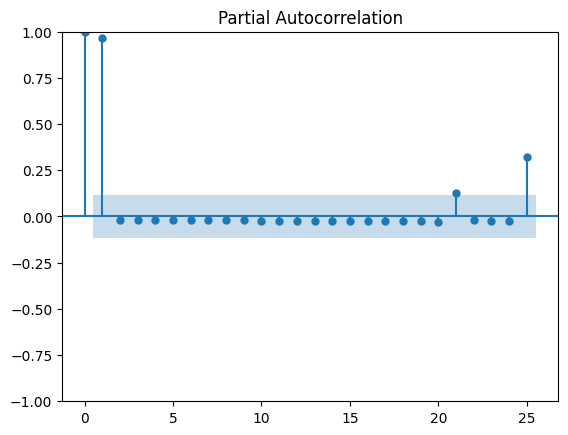

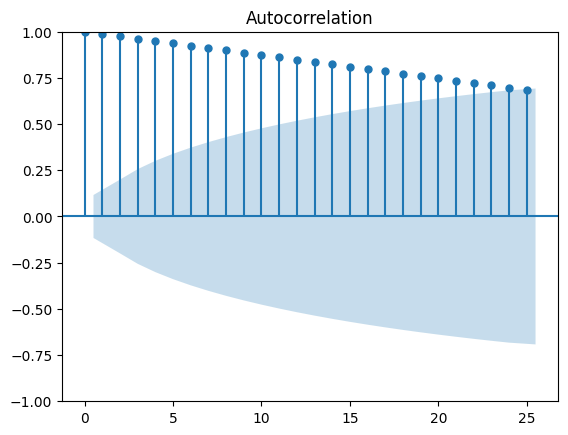

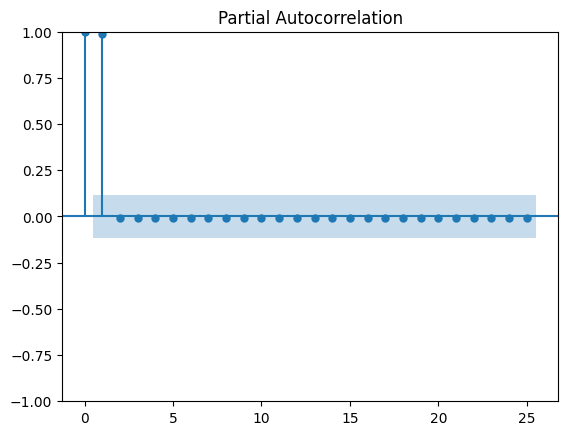

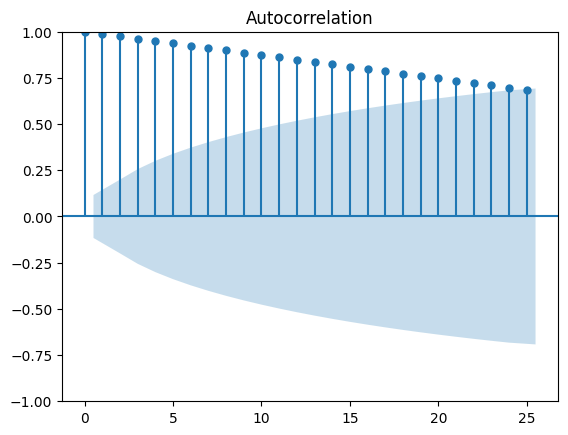

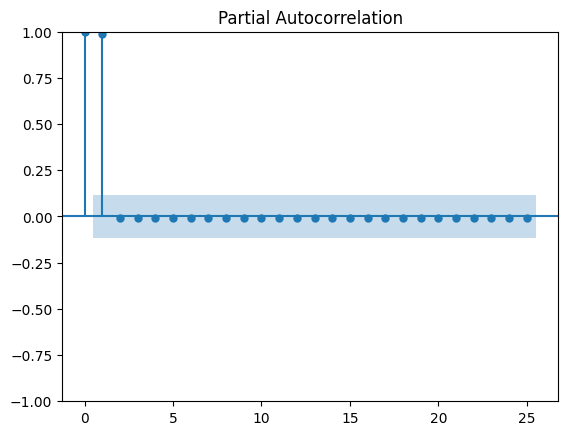

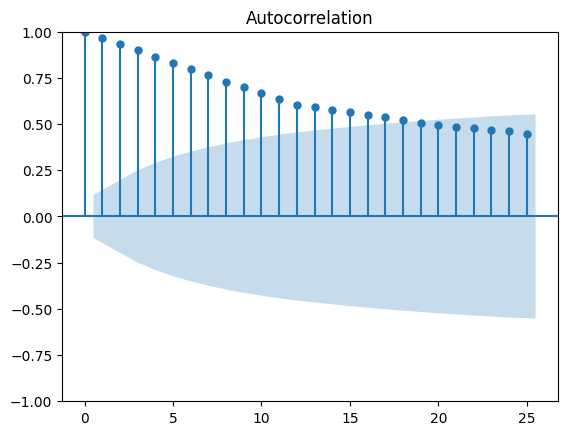

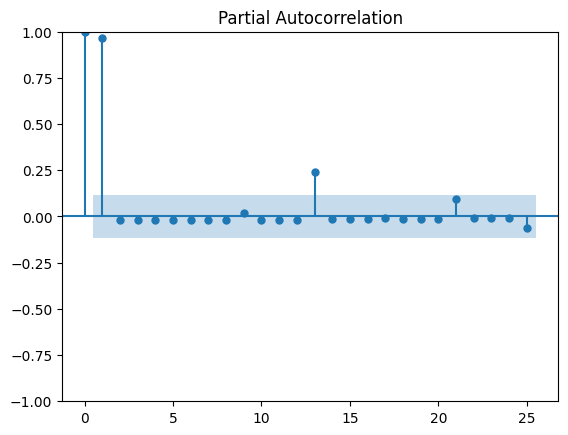

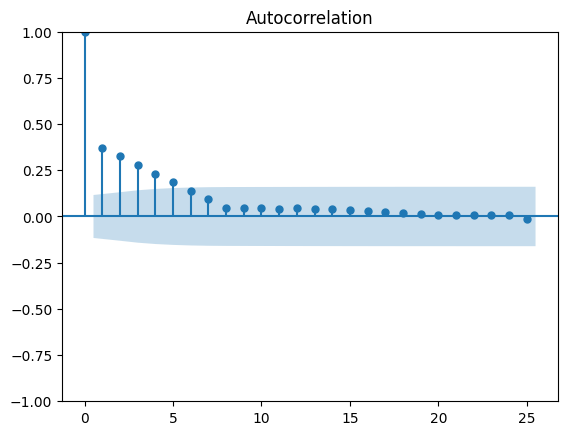

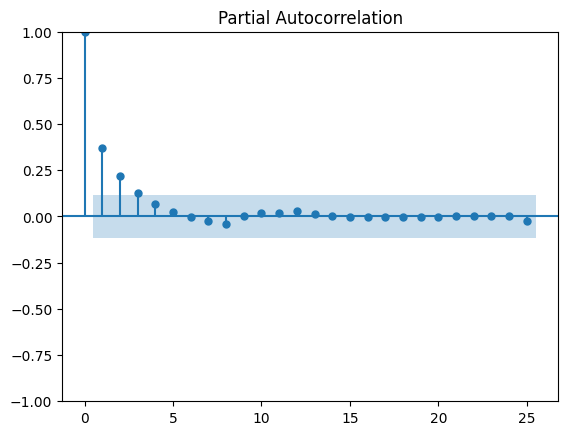

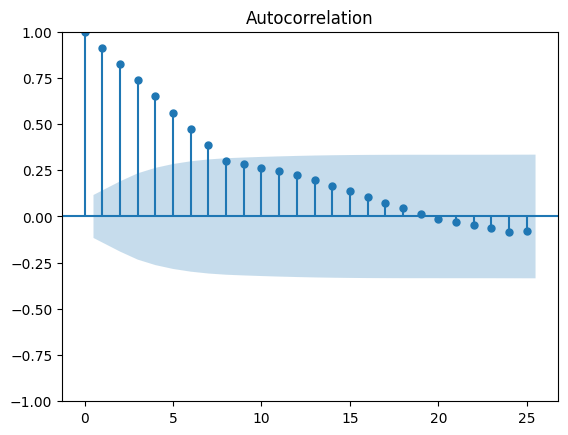

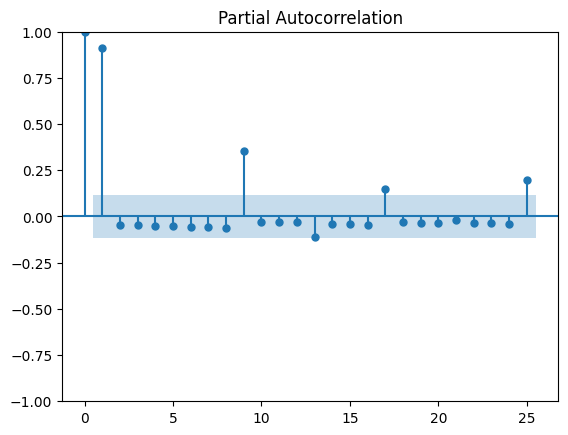

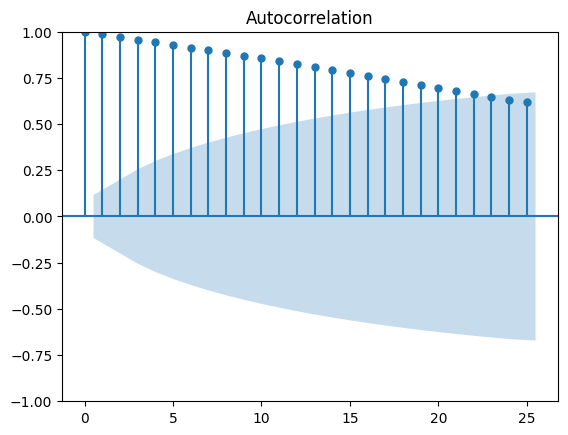

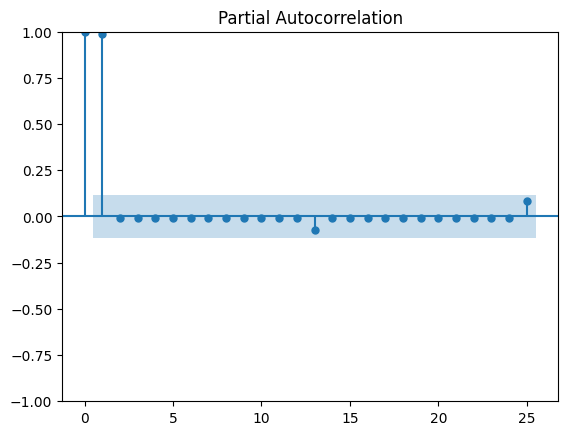

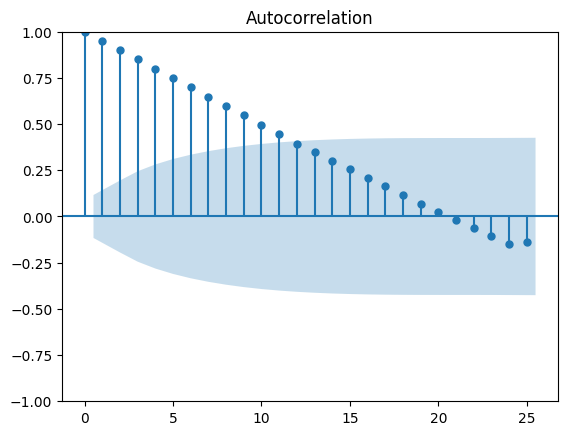

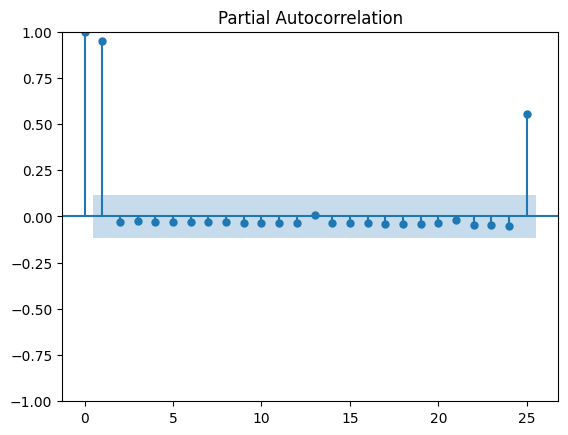

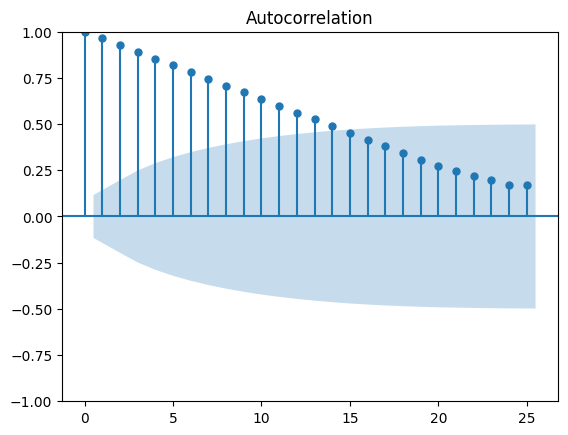

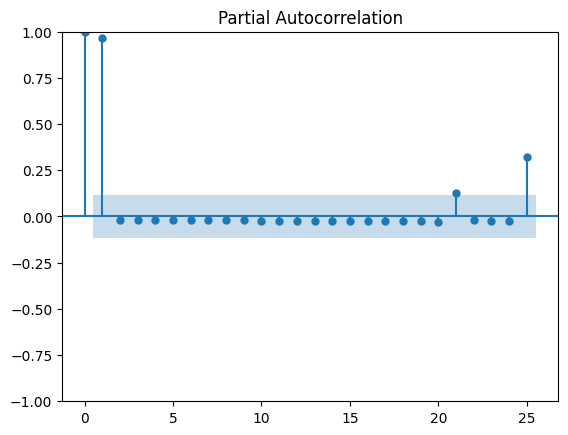

In [173]:
plot_acf(data['Rent'])
plot_pacf(data['Rent'])
plot_acf(data['Electricity'])
plot_pacf(data['Electricity'])
plot_acf(data['Salaries and Wages'])
plot_pacf(data['Salaries and Wages'])
plot_acf(data['Office Supplies'])
plot_pacf(data['Office Supplies'])
plot_acf(data['Marketing and Ads'])
plot_pacf(data['Marketing and Ads'])
plot_acf(data['R&D'])
plot_pacf(data['R&D'])
plot_acf(data['Training programs'])
plot_pacf(data['Training programs'])
plot_acf(data['Miscellaneous'])
plot_pacf(data['Miscellaneous'])


In [188]:
import itertools
import statsmodels.api as sm

# Defined ranges for p, d, and q
p_range = range(0, 3)
d_range = range(0, 2)
q_range = range(0, 3)

# Perform grid search
best_aic = float("inf")
best_order = None

for p, d, q in itertools.product(p_range, d_range, q_range):
    model = sm.tsa.ARIMA(data['Rent'], order=(p, d, q))
    results = model.fit()
    aic = results.aic

    if aic < best_aic:
        best_aic = aic
        best_order = (p, d, q)

print("Best AIC:", best_aic)
print("Best Order (p, d, q):", best_order)

for p, d, q in itertools.product(p_range, d_range, q_range):
    model = sm.tsa.ARIMA(data['Electricity'], order=(p, d, q))
    results = model.fit()
    aic = results.aic

    if aic < best_aic:
        best_aic = aic
        best_order = (p, d, q)

print("Best AIC:", best_aic)
print("Best Order (p, d, q):", best_order)

for p, d, q in itertools.product(p_range, d_range, q_range):
    model = sm.tsa.ARIMA(data['Salaries and Wages'], order=(p, d, q))
    results = model.fit()
    aic = results.aic

    if aic < best_aic:
        best_aic = aic
        best_order = (p, d, q)

print("Best AIC:", best_aic)
print("Best Order (p, d, q):", best_order)

for p, d, q in itertools.product(p_range, d_range, q_range):
    model = sm.tsa.ARIMA(data['Office Supplies'], order=(p, d, q))
    results = model.fit()
    aic = results.aic

    if aic < best_aic:
        best_aic = aic
        best_order = (p, d, q)

print("Best AIC:", best_aic)
print("Best Order (p, d, q):", best_order)

for p, d, q in itertools.product(p_range, d_range, q_range):
    model = sm.tsa.ARIMA(data['Marketing and Ads'], order=(p, d, q))
    results = model.fit()
    aic = results.aic

    if aic < best_aic:
        best_aic = aic
        best_order = (p, d, q)

print("Best AIC:", best_aic)
print("Best Order (p, d, q):", best_order)

for p, d, q in itertools.product(p_range, d_range, q_range):
    model = sm.tsa.ARIMA(data['R&D'], order=(p, d, q))
    results = model.fit()
    aic = results.aic

    if aic < best_aic:
        best_aic = aic
        best_order = (p, d, q)

print("Best AIC:", best_aic)
print("Best Order (p, d, q):", best_order)

for p, d, q in itertools.product(p_range, d_range, q_range):
    model = sm.tsa.ARIMA(data['Training programs'], order=(p, d, q))
    results = model.fit()
    aic = results.aic

    if aic < best_aic:
        best_aic = aic
        best_order = (p, d, q)

print("Best AIC:", best_aic)
print("Best Order (p, d, q):", best_order)

for p, d, q in itertools.product(p_range, d_range, q_range):
    model = sm.tsa.ARIMA(data['Miscellaneous'], order=(p, d, q))
    results = model.fit()
    aic = results.aic

    if aic < best_aic:
        best_aic = aic
        best_order = (p, d, q)

print("Best AIC:", best_aic)
print("Best Order (p, d, q):", best_order)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_date

Best AIC: 5642.361287063519
Best Order (p, d, q): (0, 1, 0)


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_date

Best AIC: 4339.098124428889
Best Order (p, d, q): (0, 1, 0)


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_date

Best AIC: 10.0
Best Order (p, d, q): (2, 1, 2)


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_date

Best AIC: 10.0
Best Order (p, d, q): (2, 1, 2)


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_date

Best AIC: 10.0
Best Order (p, d, q): (2, 1, 2)


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_date

Best AIC: 10.0
Best Order (p, d, q): (2, 1, 2)


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_date

Best AIC: 10.0
Best Order (p, d, q): (2, 1, 2)


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_date

Best AIC: 10.0
Best Order (p, d, q): (2, 1, 2)


# Step 8: Train ARIMA Model
**Replaced (p, d, q) with the values you determined from ACF and PACF plots**

In [192]:
p, d, q = 1, 0, 1
model_rent = SARIMAX(data['Rent'], order=(p, d, q))
results_rent = model_rent.fit()

p, d, q = 1, 0, 1
model_electricity = SARIMAX(data['Electricity'], order=(p, d, q))
results_electricity = model_electricity.fit()

p, d, q = 2, 1, 2
model_salaries = SARIMAX(data['Salaries and Wages'], order=(p, d, q))
results_salaries = model_salaries.fit()

p, d, q = 2, 1, 2
model_electricity = SARIMAX(data['Office Supplies'], order=(p, d, q))
results_electricity = model_electricity.fit()

p, d, q = 2, 1, 2
model_salaries = SARIMAX(data['Marketing and Ads'], order=(p, d, q))
results_salaries = model_salaries.fit()

p, d, q = 2, 1, 2
model_electricity = SARIMAX(data['R&D'], order=(p, d, q))
results_electricity = model_electricity.fit()

p, d, q = 2, 1, 2
model_salaries = SARIMAX(data['Training programs'], order=(p, d, q))
results_salaries = model_salaries.fit()

p, d, q = 2, 1, 2
model_salaries = SARIMAX(data['Miscellaneous'], order=(p, d, q))
results_salaries = model_salaries.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred

# Step 9: Model Evaluation

**Evaluated the model on the training data**

In [193]:
predictions = results.predict(start=0, end=len(data) - 1, dynamic=False)
mae = np.mean(np.abs(predictions - data['Rent']))
mse = np.mean((predictions - data['Rent'])**2)
print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)

Mean Absolute Error: nan
Mean Squared Error: nan


# Step 9: Forecast Total Expenditures

**Forecasted Total Expenditures for the Next 4 Months**

In [199]:
forecast_periods = 4
forecast = results.get_forecast(steps=forecast_periods)
forecast_mean = forecast.predicted_mean

total_forecast = forecast_mean.sum()

# Created a dictionary with the desired date format and the total forecast value
date_format = [f"2023-{month:02d}" for month in range(9, 13)]
total_forecast_dict = dict(zip(date_format, [total_forecast] * forecast_periods))

# Total forecast for the next 4 months
print("\nTotal Forecast for the Next 4 Months:")
print(total_forecast_dict)



Total Forecast for the Next 4 Months:
{'2023-09': 79609.72255775484, '2023-10': 79609.72255775484, '2023-11': 79609.72255775484, '2023-12': 79609.72255775484}
